In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

#reading the data
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df['Customer Lifetime Value'].min()

1898.007675

In [ ]:
df['Customer Lifetime Value'].max()

83325.38119

<Axes: ylabel='Density'>

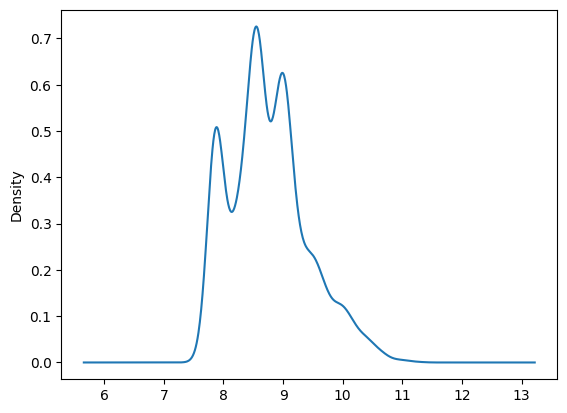

In [ ]:
df['Customer Lifetime Value'] = np.log(df['Customer Lifetime Value'])

df['Customer Lifetime Value'].plot(kind='kde')

In [ ]:
df_min = 7.54856002289194
df['Customer Lifetime Value'].min()

7.54856002289194

In [ ]:
df_max = 11.33050847790295
df['Customer Lifetime Value'].max()

11.33050847790295

In [ ]:
# Searching for NaN values
dropnans = df.dropna()
dropnans

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,7.924260,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,8.850738,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,9.464008,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,8.941920,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,7.942253,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,10.060747,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,8.038031,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,9.007476,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,8.925912,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Response'] = pd.to_numeric(df['Response'].map({'No':1,'Yes':2}))
df['Coverage'] = pd.to_numeric(df['Coverage'].map({'Basic':1,'Extended':2,'Premium':3}))
df['Education'] = pd.to_numeric(df['Education'].map({'High School or Below':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5}))
df['Vehicle Size'] = pd.to_numeric(df['Vehicle Size'].map({'Small':1,'Medsize':2,'Large':3}))


label_encoder = LabelEncoder()
categorical_cols = ['Customer', 'State','Effective To Date', 'EmploymentStatus','Gender', 'Marital Status','Location Code',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class']


for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df['Education'].unique()

array([3, 2, 4, 1, 5])

In [ ]:
#df = df.drop(['Customer','Effective To Date'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   int64  
 1   State                          9134 non-null   int64  
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   int64  
 4   Coverage                       9134 non-null   int64  
 5   Education                      9134 non-null   int64  
 6   Effective To Date              9134 non-null   int64  
 7   EmploymentStatus               9134 non-null   int64  
 8   Gender                         9134 non-null   int64  
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   int64  
 11  Marital Status                 9134 non-null   int64  
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:

eda_df = df.drop(['Customer','Effective To Date','Education','Income',
              'State','Response','EmploymentStatus','Policy',
              'Policy Type','Gender','Sales Channel','Location Code'], axis=1)


In [ ]:
#Education

df = df.drop(['Customer','Effective To Date'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

X = test.drop(['Customer Lifetime Value'], axis=1)
y = test['Customer Lifetime Value']

train_x = train.drop(['Customer Lifetime Value'], axis=1)
train_y = train['Customer Lifetime Value']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
def RMSE(y_true,y_pred):
  rmse = mean_squared_error(y_true,y_pred,squared=False)
  return rmse

def tr_score():
  return make_scorer(RMSE)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
grid_vals = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]}
model = DecisionTreeRegressor()

grid_dt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=5,scoring=tr_score())

grid_dt.fit(train_x, train_y)
preds = grid_dt.best_estimator_.predict(X)

print("Training Score: ", grid_dt.best_score_)
print("Test Score: ", rmse(preds, y))
print("best params: ", grid_dt.best_params_)

Training Score:  0.3365283806769139
Test Score:  0.3367682376892064
best params:  {'max_depth': 12, 'max_leaf_nodes': 4}


RT

In [ ]:

grid_vals = {'n_estimators':[50,100,1000],
             'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,13,14,15],
             'max_features':["sqrt", "log2"]}
model = RandomForestRegressor()

grid_rt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=5,scoring=tr_score())

grid_rt.fit(train_x, train_y)
preds = grid_rt.best_estimator_.predict(X)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


rmse(preds, y)

print("Training Score: ", grid_rt.best_score_)
print("Test Score: ", rmse(preds, y))
print("best params: ", grid_rt.best_params_)

Training Score:  0.48514043381677074
Test Score:  0.49137289962806546
best params:  {'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 50}


RT Model RMSE and Params:
0.3627778661824365
{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 15,
 'n_estimators': 50}

In [ ]:
# boosted tree

grid_vals = {'n_estimators':[50,100,1000],
             'learning_rate':[0.001,0.05,0.1],
             'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,13,14,15],
             'max_features':["sqrt", "log2"]}
model = GradientBoostingRegressor()

grid_bt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=5,scoring=tr_score())

grid_bt.fit(train_x, train_y)
preds = grid_bt.best_estimator_.predict(X)


print("Training Score: ", grid_bt.best_score_)
print("Test Score: ", rmse(preds, y))
print("best params: ", grid_bt.best_params_)

Training Score:  0.6402803884783366
Test Score:  0.6593672417462739
best params:  {'learning_rate': 0.001, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'n_estimators': 50}


Models with EDA data

In [ ]:
train, test = train_test_split(eda_df, test_size=0.2)

X_eda = test.drop(['Customer Lifetime Value'], axis=1)
y_eda = test['Customer Lifetime Value']

train_x_eda = train.drop(['Customer Lifetime Value'], axis=1)
train_y_eda = train['Customer Lifetime Value']

In [ ]:
grid_vals = {'max_depth':[2,3,4,5,6,7,8,9], 'max_leaf_nodes':[4,5,6,7,8,9]}
model = DecisionTreeRegressor()

grid_dt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=5,scoring=tr_score())

grid_dt.fit(train_x_eda, train_y_eda)
preds = grid_dt.best_estimator_.predict(X_eda)

print("Training Score: ", grid_dt.best_score_)
print("Test Score: ", rmse(preds, y_eda))
print("best params: ", grid_dt.best_params_)

Training Score:  0.33741178230927255
Test Score:  0.3321606526479536
best params:  {'max_depth': 8, 'max_leaf_nodes': 4}


In [ ]:
grid_vals = {'n_estimators':[50,100,1000],
             'max_depth':[3,4,5,6,7,8,9],
             'max_leaf_nodes':[4,5,6,7,8,9],
             'max_features':["sqrt", "log2"]}
model = RandomForestRegressor()

grid_rts = GridSearchCV(estimator=model, param_grid=grid_vals,
                        cv=5,scoring=tr_score())

grid_rts.fit(train_x_eda, train_y_eda)
preds = grid_rts.best_estimator_.predict(X_eda)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


print("Training Score: ", grid_rts.best_score_)
print("Test Score: ", rmse(preds, y_eda))
print("best params: ", grid_rts.best_params_)

Training Score:  0.4344613906760843
Test Score:  0.42406076462238257
best params:  {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 50}


In [ ]:
# boosted tree

grid_vals = {'n_estimators':[50],
             'learning_rate':[0.001],
             'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,13,14,15],
             'max_features':["sqrt", "log2"]}
model = GradientBoostingRegressor()

grid_bt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=5,scoring=tr_score())

grid_bt.fit(train_x_eda, train_y_eda)
preds = grid_bt.best_estimator_.predict(X_eda)

print("Training Score: ", grid_bt.best_score_)
print("Test Score: ", rmse(preds, y_eda))
print("best params: ", grid_bt.best_params_)

Training Score:  0.6412156151085363
Test Score:  0.63965273338586
best params:  {'learning_rate': 0.001, 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 50}


Models with Feature Selection

In [ ]:
#Removing columns with less importance with respect to CLV

df_fs = df.drop(['State','Coverage','Renew Offer Type','Vehicle Class',
           'Response','Gender','Location Code','Vehicle Size',
           'Policy','Policy Type','Sales Channel'], axis=1)

In [ ]:
train, test = train_test_split(df_fs, test_size=0.2)

X_fs = test.drop(['Customer Lifetime Value'], axis=1)
y_fs = test['Customer Lifetime Value']

train_x_fs = train.drop(['Customer Lifetime Value'], axis=1)
train_y_fs = train['Customer Lifetime Value']

In [ ]:
grid_vals = {'n_estimators':[50,100,1000],
             'max_depth':[5,6,7,8,9,10,11,12],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,13,14,15],
             'max_features':["sqrt", "log2"]}
model = RandomForestRegressor()

grid_fs = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=5,scoring=tr_score())

grid_fs.fit(train_x_fs, train_y_fs)
preds = grid_fs.best_estimator_.predict(X_fs)

print("Training Score: ", grid_fs.best_score_)
print("Test Score: ", rmse(preds, y_fs))
print("best params: ", grid_fs.best_params_)

Training Score:  0.4298900254561153
Test Score:  0.4226416666794312
best params:  {'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 50}


In [ ]:
# boosted tree

grid_vals = {'n_estimators':[50, 100],
             'learning_rate':[0.001],
             'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,13,14,15],
             'max_features':["sqrt", "log2"]}
model = GradientBoostingRegressor()

grid_bt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=5,scoring=tr_score())

grid_bt.fit(train_x_fs, train_y_fs)
preds = grid_bt.best_estimator_.predict(X_fs)

print("Training Score: ", grid_bt.best_score_)
print("Test Score: ", rmse(preds, y_fs))
print("best params: ", grid_bt.best_params_)

Training Score:  0.6396343605470527
Test Score:  0.6450386619466248
best params:  {'learning_rate': 0.001, 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'n_estimators': 50}
